# Praca domowa 1
## Konstanty Kraszewski

Eksploracja [zbioru danych](https://www.apispreadsheets.com/datasets/129) dotyczącego pożarów w parku Montesinho w Portugalii.

## Zaimportowanie pakietów

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')

## Załadowanie zbioru danych

In [35]:
df = pd.read_csv('forest_fires_dataset.csv')
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51.0,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33.0,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33.0,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97.0,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99.0,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32.0,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71.0,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70.0,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42.0,4.0,0.0,0.00


### Zamiana nazw miesięcy i dni tygodnia na liczby do ułatwienia późniejszej analizy

In [36]:
months_dict = {'mar':3, 'oct':10, 'aug':8, 'sep':9, 'apr':4, 'jun':6, 'jul':7, 'feb':2, 'jan':1, 'dec':12, 'may':5, 'nov':11}
days_dict = {'fri':5, 'tue':2, 'sat':6, 'sun':7, 'mon':1, 'wed':3, 'thu':4}
df['month'] = df['month'].apply(lambda x : months_dict[x])
df['day'] = df['day'].apply(lambda x : days_dict[x])
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51.0,6.7,0.0,0.00
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33.0,0.9,0.0,0.00
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33.0,1.3,0.0,0.00
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97.0,4.0,0.2,0.00
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99.0,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,7,81.6,56.7,665.6,1.9,27.8,32.0,2.7,0.0,6.44
513,2,4,8,7,81.6,56.7,665.6,1.9,21.9,71.0,5.8,0.0,54.29
514,7,4,8,7,81.6,56.7,665.6,1.9,21.2,70.0,6.7,0.0,11.16
515,1,4,8,6,94.4,146.0,614.7,11.3,25.6,42.0,4.0,0.0,0.00


## Analiza

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    int64  
 3   day     517 non-null    int64  
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    float64
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(9), int64(4)
memory usage: 52.6 KB


* Nie ma braków w danych.
* Zmienne kategoryczne jako liczby całkowite, a ilościowe jako liczby zmiennoprzecinkowe.

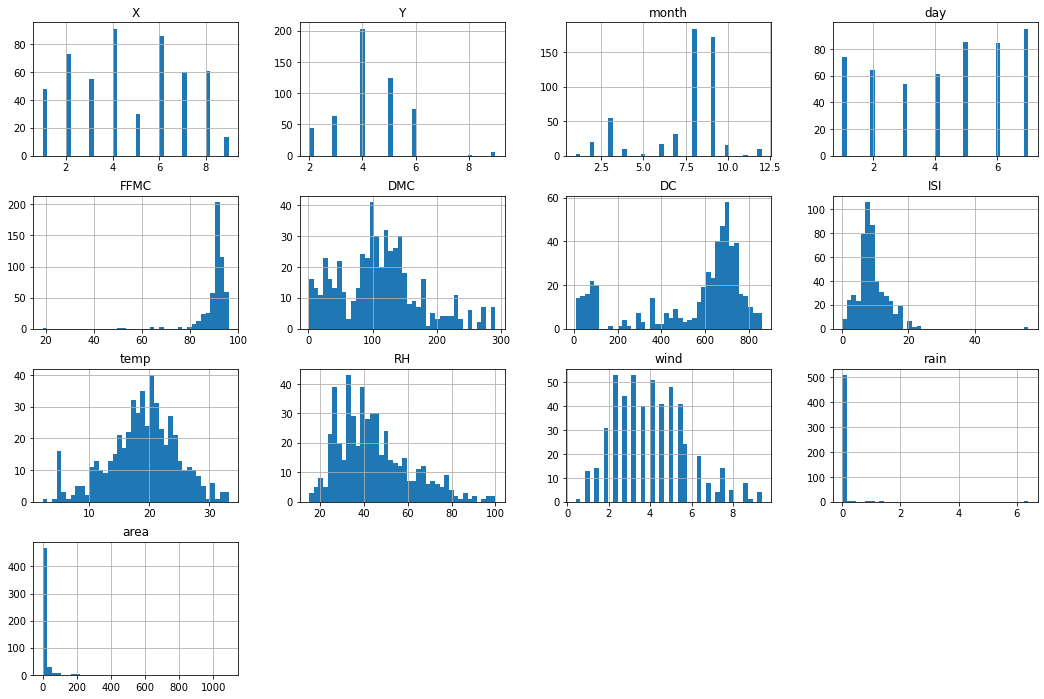

In [38]:
df.hist(bins = 40, figsize = (18,12))
plt.show()

* Najwięcej obserwacji w sierpniu i wrześniu oraz w okolicy weekendu.
* Zmienne `DCM`, `temp`, `RH` i `wind` mają rozkłady najbardziej zbliżone do rozkładu normalnego.
* Zdecydowana większość wartości zmiennych `rain` oraz `area` jest równa lub bardzo bliska zeru.
* Zmienna `DC` wyraźnie podzielona na dwa przedziały.

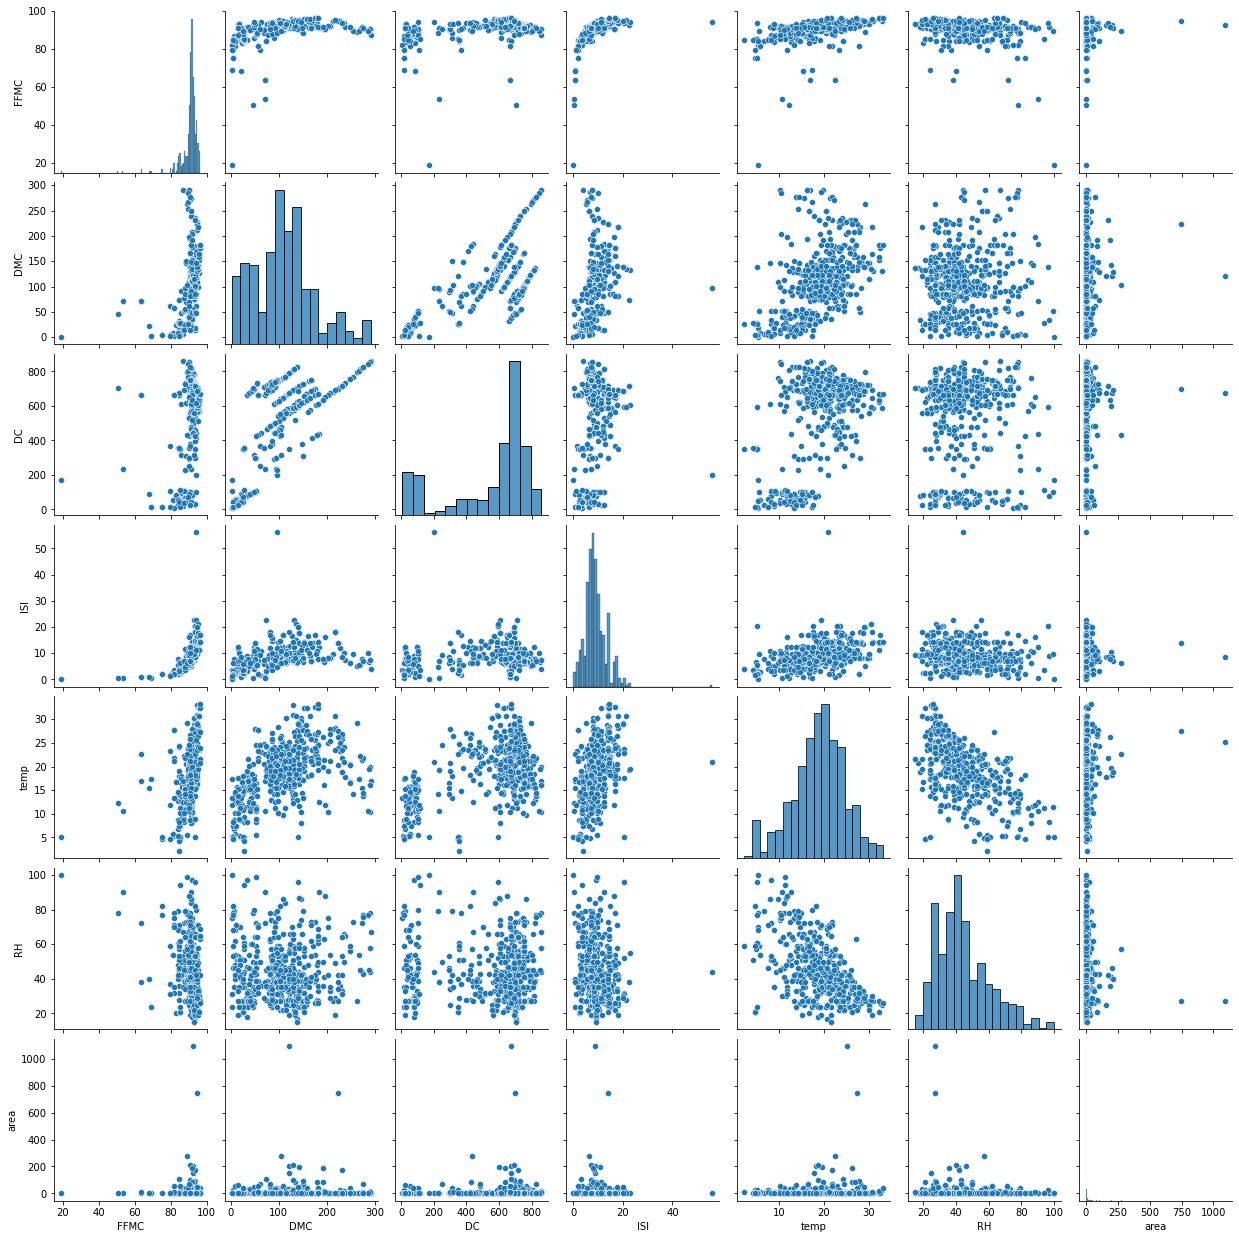

In [39]:
sns.pairplot(df.iloc[:,[4,5,6,7,8,9,12]])
plt.show()

* Najbardziej widoczne zależności pomiędzy `DMC` i `DC`, `FFMC` i `ISI`, `temp` i `RH`.

In [40]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title='Pandas Profiling Report')
profile.to_widgets()

* Przydatne narzędzie, ładnie i przejrzyście przedstawia analizę.
* Liczy bardzo dużo rzeczy, więc przy większej ilości danych może długo się tworzyć.
* Prawdopodobnie nie wszystkie wygenerowane informacje się przydadzą.